# This notebook implements a basic CNN for MNIST Digits Classification

In [22]:
# import required libraries
import numpy as np
import torch
# datasets
import torchvision.datasets as datasets
# transforms
import torchvision.transforms as transforms
# for plots
import matplotlib.pyplot as plt
# neural network modules
import torch.nn as nn

In [24]:
# set device to cuda(gpu)
device = torch.device("cuda")

## Download the dataset

In [7]:
# downloading with transform

# define transform
transform = transforms.Compose(
    [
        transforms.ToTensor() # Just transform from the image datatype to PyTorch Tensors
    ]
)

# download train and test datasets
train_dataset = datasets.MNIST(root='../data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='../data', train=False, download=True, transform=transform)

In [10]:
# extract an image, label pair
image, label = train_dataset[0]
assert image.dtype == torch.float32, "Convert images to tensors"

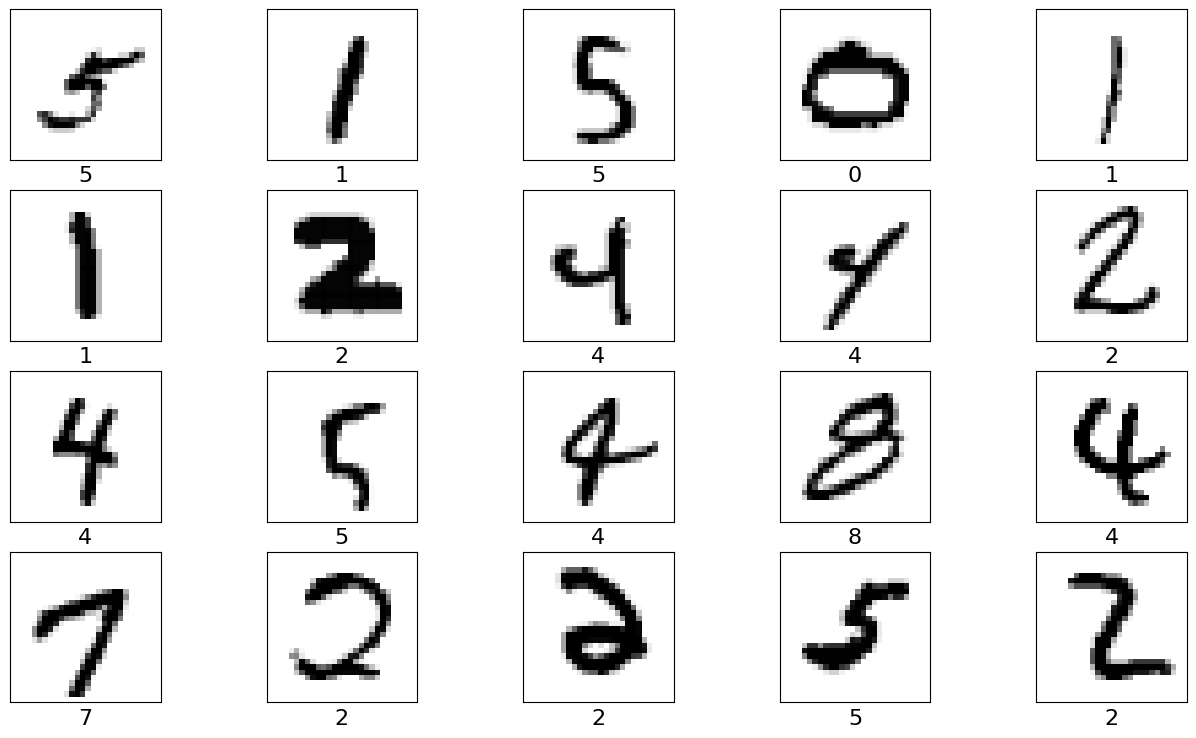

In [21]:
# visualize some images
plt.figure(figsize=(16,9))
rand_idxs = np.random.choice(len(train_dataset), 20)
for i,idx in enumerate(rand_idxs):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    image, label = train_dataset[idx]
    plt.imshow(image.squeeze(), cmap=plt.cm.binary)
    plt.xlabel(label, fontsize=16)

Above are some images and their labels from training dataset.
### Build CNN Model
Starting with a simple CNN model:
1. One Convolution layer
2. One Max Pooling Layer
3. One Fully Connected Linear Layer

In [23]:
# A Basic CNN using nn.Module

class Basic_CNN(nn.Module):
    def __init__(self):
        super(Basic_CNN, self).__init__()
        self.conv = nn.Conv2d(in_channels=1,out_channels=24,kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc_linear = nn.Linear(in_features=24*26*26, out_features=10)
        self.relu = nn.ReLU()
    
    def forward(self,X):
        X = self.conv(X)
        X = self.pool(X)
        x = self.flatten(X)
        x = self.fc_linear(x)
        x = self.relu(x)
        return x

In [27]:
# Instantiate a model and move it to gpu
basic_cnn_model = Basic_CNN().to(device)
# print the model parameters
print(basic_cnn_model)

Basic_CNN(
  (conv): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc_linear): Linear(in_features=16224, out_features=10, bias=True)
  (relu): ReLU()
)
